## 1. 데이터셋 소개


- 붓꽃에 대한 데이터
- Sepal(꽃받침) Length / Width
- Petal(꽃잎) Length / Width
- Species (Setosa, Versicolor, Virginica) 

<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png" width=700 height=300>

## 2. 목표

- 꽃잎(Petal)과 꽃받침(Sepal)의 Width와 Length만 보고 붓꽃의 품종(Species)를 **'분류'** 하는 문제 
- 주어진 15개 문항을 통해 문제 해결

## 3. 분석에 필요한 패키지 불러오기

In [32]:
# Q1. 데이터 분석을 위한 패키지
import pandas as pd

# Q2. 수치 연산을 위한 패키지
import numpy as np

# Q3. 데이터 시각화를 위한 패키지
import matplotlib.pyplot as plt

# Q4. 고급 시각화를 위한 패키지
import seaborn as sns

# ignore warnings - 필요없는 경고 메시지 표시 X
import warnings
warnings.filterwarnings('ignore')

## 4. 데이터 불러오기 및 확인

<span style = "color:red"> Q5. 'iris.csv' 파일을 읽어와 데이터프레임으로 변환하여 저장하세요 (3~6주차 실습 파일 참고)

In [33]:
### 답
# 여기에 답을 작성하시오.
iris = pd.read_csv('iris.csv')

In [34]:
# 데이터프레임 출력
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<span style = "color:red"> Q6. 데이터프레임의 첫 10행 출력하세요 (3주차 실습파일)

In [35]:
### 답
# 여기에 답을 작성하시오.
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


<span style = "color:red"> Q7. 행과 컬럼 수 확인하는 코드 작성하세요 (3주차 실습 파일 참고)

In [36]:
### 답
# 여기에 작성하시오.

print(iris.shape)


(150, 6)


In [37]:
# 데이터프레임의 기본 정보
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<span style = "color:red"> Q8. 결측치가 존재하는가? / 그 이유는 무엇일까요?

In [38]:
### 답
# 여기에 작성하시오.
#shape로 확인한 결과와 info로 확인한 결과가 150으로 같기에 결측치가 없다고 판단했다


<span style = "color:red"> Q9. 결측치 여부를 한눈에 파악할 수 있는 코드를 작성하세요 (3주차 실습 파일 참고)

In [39]:
### 답
# 여기에 작성하시오.
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 5. 데이터 전처리

<span style = "color:red"> Q10. 현재 'Species' 컬럼이 가지고 있는 문제는 무엇일까요? 
- 머신러닝 모델을 돌리면 error 발생

In [40]:
### 답
# 여기에 답을 작성하시오.
#문자열이 포함되어있다!

<span style = "color:red"> Q11. 위 문제에 따른 필요한 조치를 취하세요 (6주차 실습 파일 참고)

- Label Encoding 적용

In [41]:
### 답
# 여기에 답을 작성하시오.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species']) 

In [42]:
# 필요없는 열 삭제
iris = iris.drop('Id', axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
# 컬럼 명 변경
# 공백은 '_'로 채우는 것을 권장
iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<span style = "color:red"> Q12. (4주차 실습 파일 참고)
- <span style="color:red"> (1) 이상치 탐지를 위해 주로 사용하는 시각화 기법이 무엇인가? (빈칸 채우기)
- <span style="color:red"> (2) 이상치가 존재하는 컬럼이 무엇인지 작성하세요.

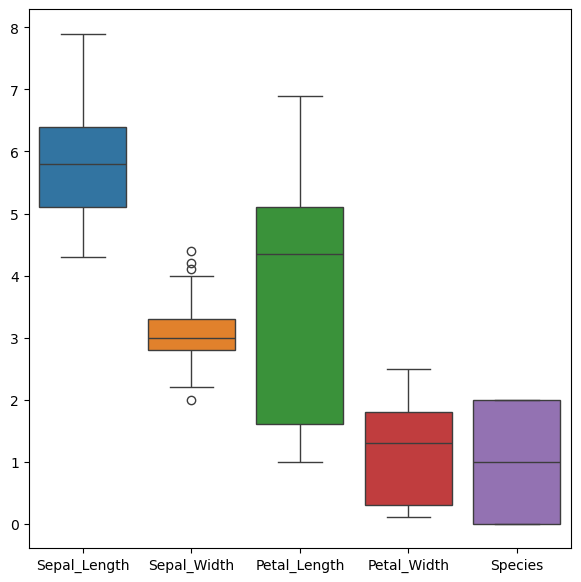

In [44]:
### 답(1)
# 아래 빈칸을 채우시오.

plt.figure(figsize=(7, 7))
sns.boxplot( data=iris) 
plt.show()


### 답(2)
# 여기에 답을 작성하시오.
#SepalWidthCm


In [45]:
# 중복 데이터 확인
iris.duplicated().sum()

3

In [46]:
# 실제 중복된 데이터 확인
iris.loc[iris.duplicated(), :]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [47]:
# 어떤 데이터와 중복인지 확인(1)
iris.loc[(iris.Sepal_Length == 4.9)&(iris.Sepal_Width == 3.1)&(iris.Petal_Length == 1.5)&(iris.Petal_Width == 0.1), :]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
9,4.9,3.1,1.5,0.1,0
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0


In [48]:
# 어떤 데이터와 중복인지 확인(2)
iris.loc[(iris.Sepal_Length == 5.8)&(iris.Sepal_Width == 2.7)&(iris.Petal_Length == 5.1)&(iris.Petal_Width == 1.9), :]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


## 6. 머신러닝

In [49]:
from sklearn.model_selection import train_test_split

<span style = "color:red"> Q13. 아래 빈칸을 채우세요 (6주차 실습 파일 참고)

In [50]:
### 답
# 아래 빈칸을 채우시오.

# feautre 값(X)과 target 값(y) 분리
X = iris.drop(columns=['Species'])
y = iris['Species']

In [54]:
# 데이터셋을 학습용과 검증용으로 분리

# test_size=0.2 : 전체 데이터의 20%는 테스트 데이터로 사용
# shuffle=True : 데이터 분할하기 전에 데이터를 섞음 (편향된 학습을 피하기 위함)
# random state=20 : 항상 동일한 방식으로 데이터를 분할하기 위해 seed 고정

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle =True, random_state=20)

# 분할된 데이터 크기 출력
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(120, 4) (120,)
(30, 4) (30,)


<span style = "color:red"> Q14. (6주차 실습 파일 참고)
- <span style = "color:red"> iris 데이터셋에서는 어떤 모델을 사용해야되는지 선택하세요
- <span style = "color:red"> 선택한 이유를 설명하세요


- LinearRegression / LogisticRegression
- DecisionTreeClassifier / DecisionTreeRegressor
- KNeighborsClassifier / KNeighborsRegressor
- RandomForestClassifier / RandomForestRegressor

In [56]:
### 답(1)
# 아래 빈칸을 채우시오.

# 분석 모델 가져오기
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### 답(2)
# 여기에 답을 작성하시오.




<span style = "color:red"> Q15. 어떠한 성능지표를 사용해야되는지 선택하세요. (6주차 실습 파일 참고)

- MSE (Mean Squared Error) / Accuracy

In [52]:
### 답
# 아래 빈칸을 채우시오.

from sklearn.metrics import accuracy_score

In [55]:
# LinearRegression or LogisticRegression 적용
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

score = accuracy_score(y_val, y_pred)
print("성능 :", score)

성능 : 0.9333333333333333


In [57]:
# DecisionTree 적용
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

score = accuracy_score(y_val, y_pred)
print("정확도 :", score)

정확도 : 0.9333333333333333


In [59]:
# K-Nearest Neighbors, KNN 적용
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

score = accuracy_score(y_val, y_pred)
print("정확도 :", score)

정확도 : 1.0


In [60]:
# RandomForest 적용
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)

score = accuracy_score(y_val, y_pred)
print("정확도 :", score)

정확도 : 0.9
